In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
bank_note = pd.read_csv('D:/Project/BankNote.csv')

In [25]:
bank_note.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


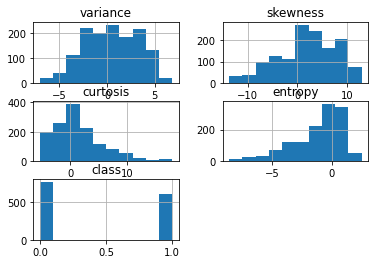

In [26]:
print(bank_note.describe())
# plot histograms
bank_note.hist()
plt.show()

In [29]:
X = bank_note.drop('class', axis=1) #Input variables
# axis=1 indicates that a column will be dropped
y = bank_note['class']  # Target variable

In [31]:
scaler = StandardScaler()

X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Building the model
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))   
model.add(Dense(1, activation='sigmoid'))

In [34]:
# Compiling the model
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=10, verbose=1)

Epoch 1/20
88/88 [==============================] - 1s 3ms/step - loss: 0.5704 - accuracy: 0.7467 - val_loss: 0.5189 - val_accuracy: 0.8136
Epoch 2/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.8042 - val_loss: 0.4445 - val_accuracy: 0.8682
Epoch 3/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8604 - val_loss: 0.3830 - val_accuracy: 0.8864
Epoch 4/20
88/88 [==============================] - 0s 1ms/step - loss: 0.3669 - accuracy: 0.8674 - val_loss: 0.3293 - val_accuracy: 0.8955
Epoch 5/20
88/88 [==============================] - 0s 1ms/step - loss: 0.3057 - accuracy: 0.9086 - val_loss: 0.2813 - val_accuracy: 0.9318
Epoch 6/20
88/88 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.9289 - val_loss: 0.2392 - val_accuracy: 0.9409
Epoch 7/20
88/88 [==============================] - 0s 1ms/step - loss: 0.2415 - accuracy: 0.9279 - val_loss: 0.1989 - val_accuracy: 0.9682
Epoch 8/20
88/88 [==

Model Accuracy is 98.6

In [36]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9782


[0.06489503383636475, 0.9781818389892578]

plotting the accuracy and loss curves for training and validation data

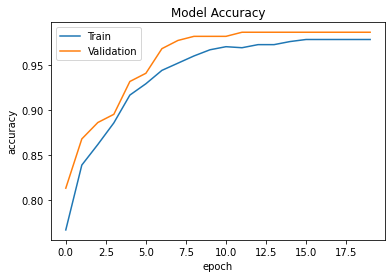

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

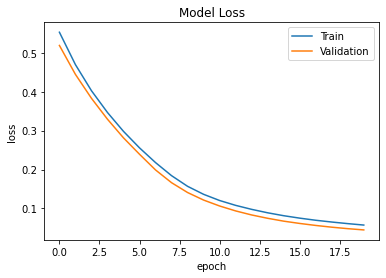

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [39]:
# Predictions

y_pred = model.predict(X_test)
print(y_pred)

[[5.70219755e-03]
 [3.88028145e-01]
 [2.42013603e-01]
 [3.19141150e-03]
 [3.32942605e-03]
 [1.47280097e-03]
 [9.01907682e-03]
 [5.12927771e-04]
 [1.69336796e-03]
 [3.35103273e-03]
 [7.85844564e-01]
 [9.70820367e-01]
 [8.92788172e-03]
 [9.28484380e-01]
 [5.78478575e-02]
 [7.09333897e-01]
 [9.66367602e-01]
 [9.68110204e-01]
 [9.00700450e-01]
 [8.95441532e-01]
 [2.47168541e-03]
 [2.17622519e-03]
 [8.99330258e-01]
 [9.08374786e-04]
 [9.86683249e-01]
 [1.01903081e-03]
 [4.53442335e-04]
 [9.52270865e-01]
 [5.01562827e-05]
 [1.11688874e-04]
 [9.64593530e-01]
 [4.67494130e-03]
 [1.52202249e-02]
 [9.78298545e-01]
 [9.80192661e-01]
 [5.57094812e-04]
 [7.31685758e-01]
 [9.49350595e-01]
 [9.74067569e-01]
 [3.33884358e-03]
 [2.44581699e-03]
 [9.60079432e-01]
 [9.58091557e-01]
 [3.20202112e-03]
 [9.86365616e-01]
 [9.51833487e-01]
 [9.80353594e-01]
 [6.60493970e-03]
 [6.51594996e-03]
 [8.15304220e-01]
 [6.10756874e-03]
 [3.38286161e-04]
 [1.21289492e-02]
 [8.54104757e-04]
 [3.21258307e-02]
 [9.481097

In [40]:
import numpy as np
y_pred = np.round(y_pred).flatten()
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0.

In [41]:
#Function to get model accuracy

from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.9781818181818182


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[144,   4],
       [  2, 125]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

